In [2]:
import zipfile
import os

# Define the path to the ZIP file
zip_file_path = 'fma_img.zip'

# Define the path to the folder where you want to extract the files
extract_folder_path = 'images'

try:
    # Create the extract folder if it doesn't exist
    if not os.path.exists(extract_folder_path):
        os.makedirs(extract_folder_path)
        print(f"Folder {extract_folder_path} created successfully.")
    else:
        print(f"Folder {extract_folder_path} already exists.")

    # Extract the ZIP file to the extract folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder_path)
    print(f"Files extracted to {extract_folder_path} successfully.")
except FileNotFoundError:
    print(f"Error: The file {zip_file_path} was not found.")
except PermissionError:
    print(f"Error: You don't have permission to create the folder {extract_folder_path} or extract the ZIP file.")
except Exception as e:
    print(f"An error occurred: {e}")

Folder images already exists.
Files extracted to images successfully.


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the class number based on your dataset
class_num = 10  # Update this with the number of classes in your dataset

def advanced_attention_module(x, attention_ratio=8, name="advanced_attention"):
    input_channel = x.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(x)
    max_pool = layers.GlobalMaxPooling2D()(x)

    shared_dense_one = layers.Dense(input_channel // attention_ratio, activation='relu', use_bias=False)
    shared_dense_two = layers.Dense(input_channel, use_bias=False)

    avg_out = shared_dense_one(avg_pool)
    avg_out = layers.ReLU()(avg_out)
    avg_out = shared_dense_two(avg_out)

    max_out = shared_dense_one(max_pool)
    max_out = layers.ReLU()(max_out)
    max_out = shared_dense_two(max_out)

    combined_attention = layers.Add()([avg_out, max_out])
    combined_attention = layers.Activation('sigmoid')(combined_attention)
    combined_attention = layers.Reshape((1, 1, input_channel))(combined_attention)

    output = layers.Multiply()([x, combined_attention])
    return output

def residual_attention_block(x, filters, kernel_size=(3, 3), padding='same', strides=1):
    conv = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, use_bias=False)(x)
    conv = layers.BatchNormalization()(conv)
    conv = layers.ReLU()(conv)

    conv = advanced_attention_module(conv, attention_ratio=8)

    conv = layers.Conv2D(filters, kernel_size, padding=padding, use_bias=False)(conv)
    conv = layers.BatchNormalization()(conv)

    shortcut = layers.Conv2D(filters, (1, 1), padding=padding, strides=strides, use_bias=False)(x)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([conv, shortcut])
    x = layers.ReLU()(x)
    return x

def build_advanced_model(input_shape=(100, 100, 3), class_num=class_num):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = residual_attention_block(x, 64)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = residual_attention_block(x, 128)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)  # Regularization
    outputs = layers.Dense(class_num, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set the path to the main directory containing subdirectories with images
main_dir = r'/content/images/fma_img'

# Initialize the model
model = build_advanced_model(input_shape=(100, 100, 3), class_num=class_num)
model.summary()

# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

# Training callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 100, 100, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 100, 100, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 100, 100, 32)         0         ['batch_normalization[0][0

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the class number based on your dataset
class_num = 10  # Update this with the number of classes in your dataset

def advanced_attention_module(x, attention_ratio=8, name="advanced_attention"):
    input_channel = x.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(x)
    max_pool = layers.GlobalMaxPooling2D()(x)

    shared_dense_one = layers.Dense(input_channel // attention_ratio, activation='relu', use_bias=False)
    shared_dense_two = layers.Dense(input_channel, use_bias=False)

    avg_out = shared_dense_one(avg_pool)
    avg_out = layers.ReLU()(avg_out)
    avg_out = shared_dense_two(avg_out)

    max_out = shared_dense_one(max_pool)
    max_out = layers.ReLU()(max_out)
    max_out = shared_dense_two(max_out)

    combined_attention = layers.Add()([avg_out, max_out])
    combined_attention = layers.Activation('sigmoid')(combined_attention)
    combined_attention = layers.Reshape((1, 1, input_channel))(combined_attention)

    output = layers.Multiply()([x, combined_attention])
    return output

def add_conv_block(x, filters, kernel_size=(3, 3), padding='same', strides=1):
    conv = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False)(x)
    conv = layers.BatchNormalization()(conv)
    conv = layers.ReLU()(conv)
    return conv

def build_model(input_shape=(100, 100, 3), class_num=class_num):
    inputs = Input(shape=input_shape)
    x = add_conv_block(inputs, 32)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = advanced_attention_module(x)

    x = add_conv_block(x, 64)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = add_conv_block(x, 128)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(class_num, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Set the path to the main directory containing subdirectories with images
main_dir = '/content/images/fma_img'

# Initialize the model
model = build_model(input_shape=(100, 100, 3), class_num=class_num)
model.summary()

# Augmenting data with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Training callbacks for dynamic adjustments
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with callbacks to monitor validation loss
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 100, 100, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_13 (Ba  (None, 100, 100, 32)         128       ['conv2d_13[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_19 (ReLU)             (None, 100, 100, 32)         0         ['batch_normalization_13

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the class number based on your dataset
class_num = 10  # Update this with the number of classes in your dataset

def advanced_attention_module(x, attention_ratio=8):
    input_channel = x.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(x)
    max_pool = layers.GlobalMaxPooling2D()(x)

    shared_dense_one = layers.Dense(input_channel // attention_ratio, activation='relu', use_bias=False)
    shared_dense_two = layers.Dense(input_channel, use_bias=False)

    avg_out = shared_dense_one(avg_pool)
    avg_out = layers.ReLU()(avg_out)
    avg_out = shared_dense_two(avg_out)

    max_out = shared_dense_one(max_pool)
    max_out = layers.ReLU()(max_out)
    max_out = shared_dense_two(max_out)

    combined_attention = layers.Add()([avg_out, max_out])
    combined_attention = layers.Activation('sigmoid')(combined_attention)
    combined_attention = layers.Reshape((1, 1, input_channel))(combined_attention)

    output = layers.Multiply()([x, combined_attention])
    return output

def add_conv_block(x, filters, kernel_size=(3, 3), padding='same', strides=1):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def build_model(input_shape=(100, 100, 3), class_num=class_num):
    inputs = Input(shape=input_shape)
    x = add_conv_block(inputs, 32)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = advanced_attention_module(x)

    x = add_conv_block(x, 64)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = add_conv_block(x, 128)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(class_num, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Set the path to the main directory containing subdirectories with images
main_dir = '/content/images/fma_img'

# Initialize the model
model = build_model(input_shape=(100, 100, 3), class_num=class_num)
model.summary()

# Augmenting data with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Training callbacks for dynamic adjustments
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)

# Train the model with callbacks to monitor validation loss
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 100, 100, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_16 (Ba  (None, 100, 100, 32)         128       ['conv2d_16[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_24 (ReLU)             (None, 100, 100, 32)         0         ['batch_normalization_16

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define class number based on your dataset
class_num = 10  # Update this with the number of classes in your dataset


def advanced_attention_module(x, attention_ratio=8):
    input_channel = x.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(x)
    max_pool = layers.GlobalMaxPooling2D()(x)

    shared_layer_one = layers.Dense(input_channel // attention_ratio, activation='relu', use_bias=False)
    shared_layer_two = layers.Dense(input_channel, use_bias=False)

    avg_out = shared_layer_one(avg_pool)
    avg_out = shared_layer_two(avg_out)
    max_out = shared_layer_one(max_pool)
    max_out = shared_layer_two(max_out)

    combined_attention = layers.Add()([avg_out, max_out])
    combined_attention = layers.Activation('sigmoid')(combined_attention)
    combined_attention = layers.Reshape((1, 1, input_channel))(combined_attention)  # Ensure correct shape

    return layers.Multiply()([x, combined_attention])

def build_model(input_shape=(100, 100, 3), class_num=10):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = advanced_attention_module(x, attention_ratio=8)

    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(class_num, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Set the path to the main directory containing subdirectories with images
main_dir = '/content/images/fma_img'

# Initialize the model

model = build_model(input_shape=(100, 100, 3), class_num=class_num)
model.summary()

# Data Generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Using 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)

# Print out the model training history
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 100, 100, 32)         896       ['input_10[0][0]']            
                                                                                                  
 activation_14 (Activation)  (None, 100, 100, 32)         0         ['conv2d_23[0][0]']           
                                                                                                  
 max_pooling2d_19 (MaxPooli  (None, 50, 50, 32)           0         ['activation_14[0][0]']       
 ng2D)                                                                                      

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def complex_attention(x, attention_ratio=8, name="complex_attention"):
    input_channel = x.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(x)
    max_pool = layers.GlobalMaxPooling2D()(x)

    shared_layer_one = layers.Dense(input_channel // attention_ratio, activation='relu', use_bias=False, name=f'{name}_dense1')
    shared_layer_two = layers.Dense(input_channel, use_bias=False, name=f'{name}_dense2')

    avg_out = shared_layer_two(shared_layer_one(avg_pool))
    max_out = shared_layer_two(shared_layer_one(max_pool))

    weight = layers.Add(name=f'{name}_add')([avg_out, max_out])
    weight = layers.Activation('sigmoid', name=f'{name}_activation')(weight)
    weight = layers.Reshape((1, 1, input_channel), name=f'{name}_reshape')(weight)

    return layers.Multiply(name=f'{name}_multiply')([x, weight])

def add_advanced_layers(x, filters, kernel_size=(3, 3)):
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout2D(0.3)(x)
    return x

def build_advanced_model(input_shape=(100, 100, 3), class_num=10):
    inputs = Input(shape=input_shape)
    x = add_advanced_layers(inputs, 32)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = complex_attention(x)

    x = add_advanced_layers(x, 64)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = add_advanced_layers(x, 128)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = add_advanced_layers(x, 256)
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(class_num, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set the path to the main directory containing subdirectories with images
main_dir = '/content/images/fma_img'

# Initialize the model
model = build_advanced_model(input_shape=(100, 100, 3), class_num=10)
model.summary()

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)

# Performance metrics
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 100, 100, 32)         896       ['input_11[0][0]']            
                                                                                                  
 batch_normalization_23 (Ba  (None, 100, 100, 32)         128       ['conv2d_25[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_17 (Activation)  (None, 100, 100, 32)         0         ['batch_normalization_23

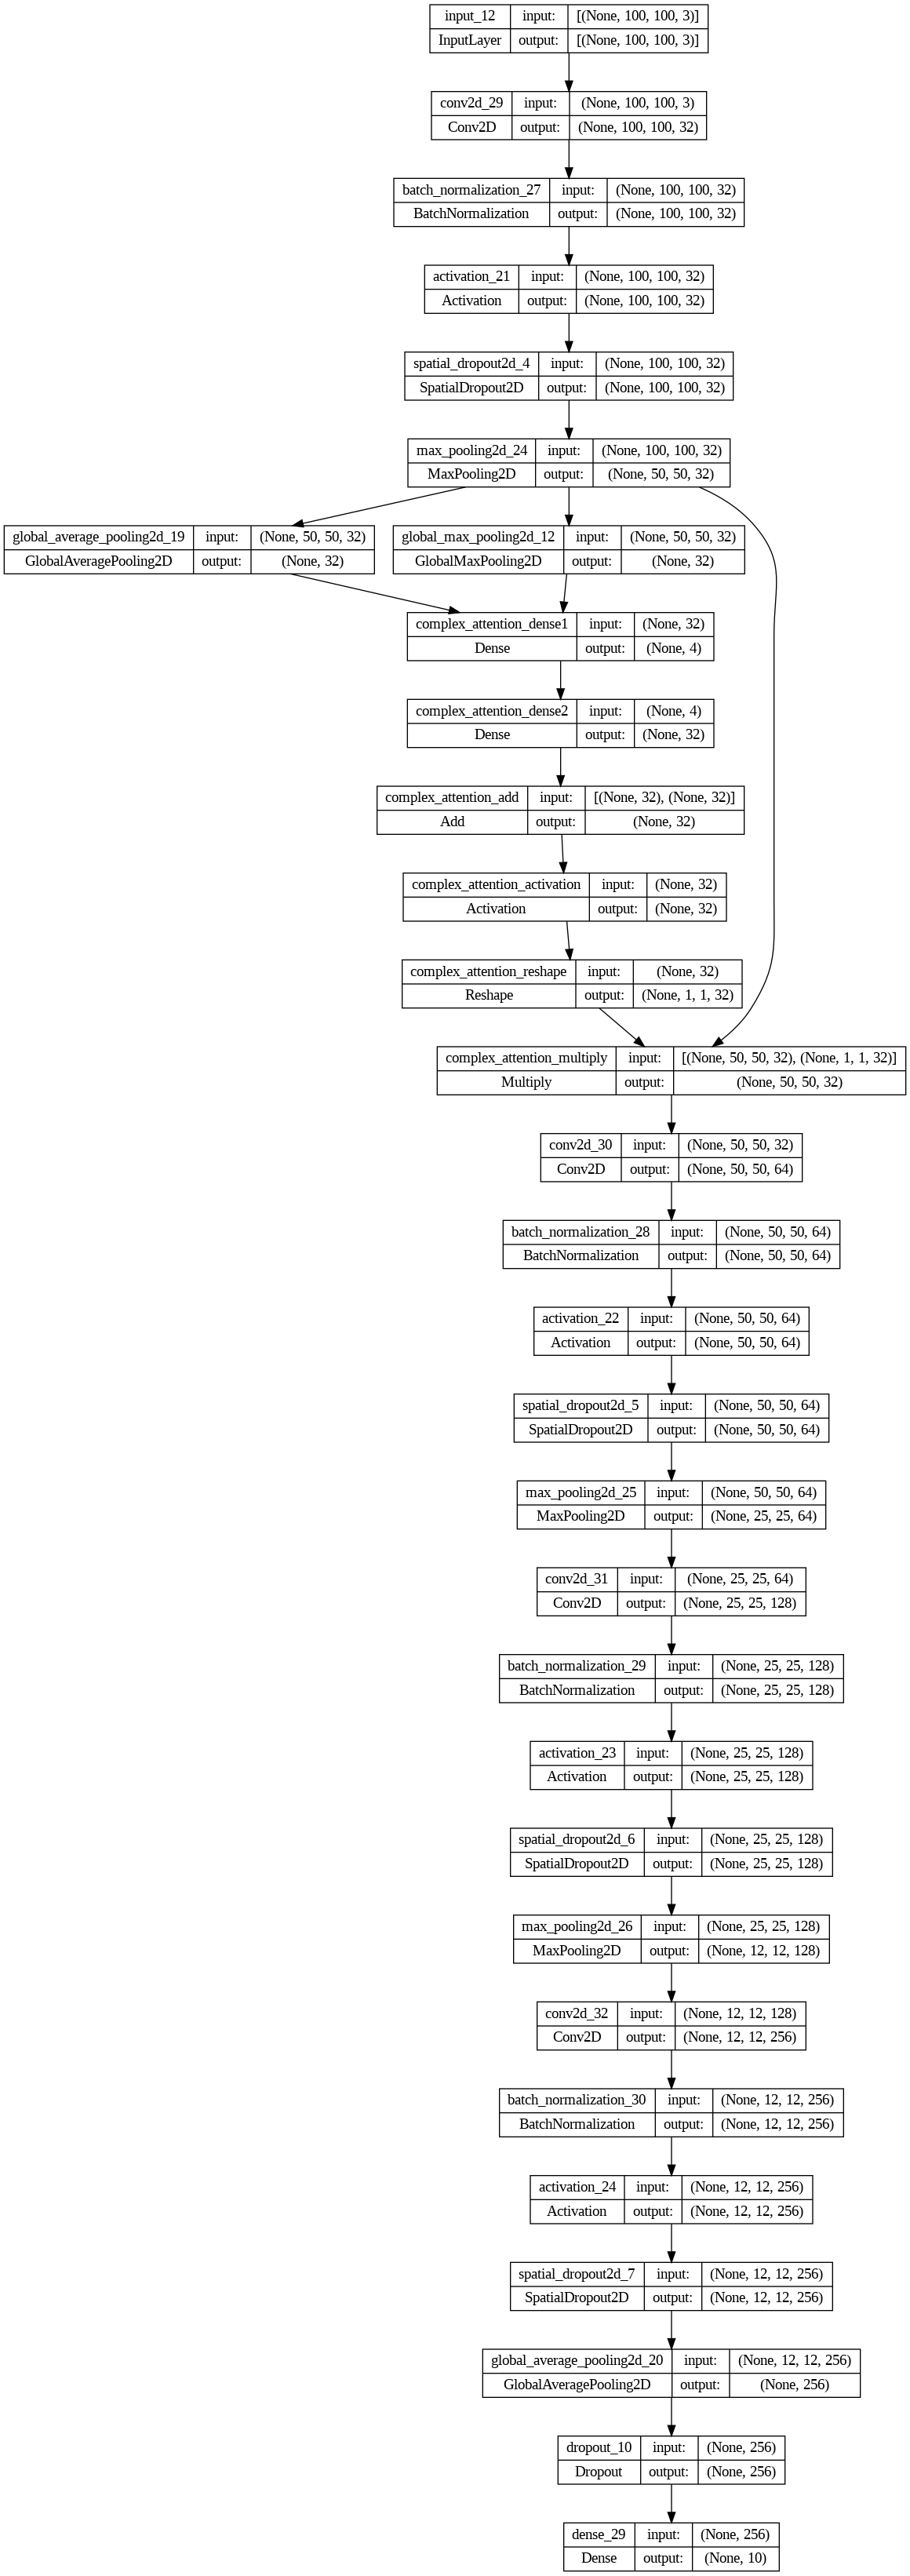

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

def complex_attention(x, attention_ratio=8, name="complex_attention"):
    input_channel = x.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(x)
    max_pool = layers.GlobalMaxPooling2D()(x)

    shared_layer_one = layers.Dense(input_channel // attention_ratio, activation='relu', use_bias=False, name=f'{name}_dense1')
    shared_layer_two = layers.Dense(input_channel, use_bias=False, name=f'{name}_dense2')

    avg_out = shared_layer_two(shared_layer_one(avg_pool))
    max_out = shared_layer_two(shared_layer_one(max_pool))

    weight = layers.Add(name=f'{name}_add')([avg_out, max_out])
    weight = layers.Activation('sigmoid', name=f'{name}_activation')(weight)
    weight = layers.Reshape((1, 1, input_channel), name=f'{name}_reshape')(weight)

    return layers.Multiply(name=f'{name}_multiply')([x, weight])

def add_advanced_layers(x, filters, kernel_size=(3, 3)):
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout2D(0.3)(x)
    return x

def build_advanced_model(input_shape=(100, 100, 3), class_num=10):
    inputs = Input(shape=input_shape)
    x = add_advanced_layers(inputs, 32)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = complex_attention(x)

    x = add_advanced_layers(x, 64)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = add_advanced_layers(x, 128)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = add_advanced_layers(x, 256)
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(class_num, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
model = build_advanced_model(input_shape=(100, 100, 3), class_num=10)

# Plot the model structure
plot_model(model, to_file='advanced_model_plot.png', show_shapes=True, show_layer_names=True)
